# Import relavent Libraries

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import plot_tree

# Train CSV import

In [54]:
# Load the training data set.
traindata = pd.read_csv('titanic_train.csv')

In [55]:
#Check first few rows of the Train dataframe.
traindata.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [56]:
#identifying the datatype.
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [57]:
#Understaning the features
traindata.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [58]:
# Identify the missing values in dataset.
traindata.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [59]:
# Drop the unnecessary feature columns. 
traindata.drop(columns=['Cabin', 'Ticket', 'Fare', 'PassengerId', 'Name'], inplace=True)

# Data transformation

In [60]:
#Convert the categorical data into numerical data
traindata['Embarked'].replace({'C': '0', 'Q':'1', 'S':'2'}, inplace = True)
traindata['Sex'].replace({'male': '0', 'female':'1'}, inplace = True)

In [61]:
# Fill the missing values in the 'Embarked' column with the mode value
traindata['Embarked'].fillna(traindata['Embarked'].mode()[0], inplace=True)

# Dealing with 'Age' missing value

In [62]:
# Split the Age columns into known and unknown parts
known_age1 = traindata[traindata['Age'].notnull()] # Split the Age columns into 2 parts (known age, and unknown age)
unknown_age1 = traindata[traindata['Age'].isnull()] 

features_for_age1 = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
X_train_age1 = known_age1[features_for_age1]
Y_train_age1 = known_age1['Age']
X_test_age1 = unknown_age1[features_for_age1]

# Model initialization

In [63]:
age_model = RandomForestRegressor(n_estimators=100, random_state=42)
age_model.fit(X_train_age1, Y_train_age1)

RandomForestRegressor(random_state=42)

In [64]:
# Predict the Age (missing) based on the features
predicted_ages1 = age_model.predict(X_test_age1)

# Check the output 
print(predicted_ages1)

# Filling the missing values in the original DataFrame
traindata.loc[traindata['Age'].isnull(), 'Age'] = predicted_ages1

[37.21491138 37.53556457 14.56429762 29.03862226 17.85551726 28.73214595
 38.75400618 17.85551726 24.24569048 29.03862226 28.73214595 33.97871785
 17.85551726 26.99490761 41.29354466 45.60654984 13.37585714 28.73214595
 28.73214595 17.85551726 28.73214595 28.73214595 28.73214595 28.908561
 17.28692965 28.73214595 37.21491138 10.99342619 27.999      28.73214595
 28.73214595  9.02463095 32.04127345 48.60020553  3.60316667 13.39319048
 31.1281234  48.60020553 17.28692965 37.21491138 17.85551726  9.02463095
 33.97871785 28.73214595  5.14179167 25.43788645 15.79596429 17.28692965
 28.73214595 34.06246325 37.21491138 22.59307937 48.60020553 17.85551726
 33.13658289 48.60020553 45.60654984 41.29354466 17.85551726 25.11805556
 29.50167693 28.73214595 34.06246325  9.02463095 20.81403283 35.87770407
 28.73214595 26.00856638 48.60020553 29.03862226 17.85551726 17.85551726
 33.97871785 14.56429762 17.85551726 38.75400618 28.73214595 37.21491138
  5.14179167 28.73214595 37.21491138 33.13658289 25.4

In [65]:
# Check again if all missing values have been filled or not
traindata.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [66]:
# Some calculations to explore the dataset
survival_rate = traindata['Survived'].mean()
print(survival_rate)

0.3838383838383838


In [67]:
traindata[traindata['Survived'] == 1].groupby(['Pclass'])['Survived'].count()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

# Plotting

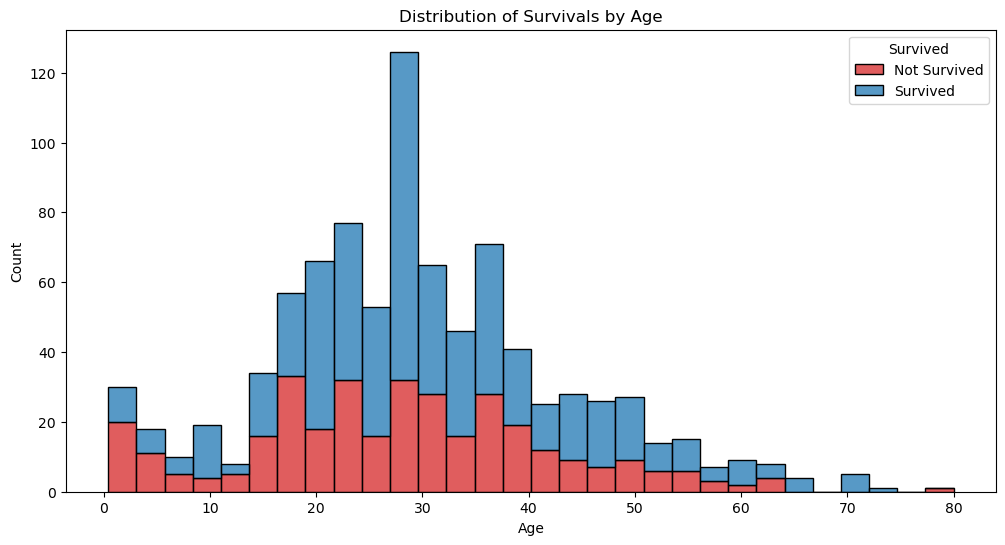

In [68]:
# Set custom colors for survival (green) and non-survival (red)
colors = ['#1f77b4', '#d62728']

# Create a histogram with custom colors
plt.figure(figsize=(12, 6))
sns.histplot(data=traindata, x='Age', hue='Survived', multiple='stack', bins=30, palette=colors)

# Manually create legend labels
plt.legend(labels=['Not Survived', 'Survived'], title='Survived', loc='upper right')

plt.title('Distribution of Survivals by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


The x-axis is labeled "Age" and goes from 0 to 120. The y-axis is labeled "Count" and goes from 0 to around 120. There are two sets of bars on the graph. The blue bars appear to show the number of people who did not survive the disaster, while the red bars show the number of survivors. 

observations that can make from the data:
01- There are more survivors in younger age groups (children and teens) than older age groups.
02- There appears to be a spike in the number of survivors in the 20-30 age group.
03- The number of survivors appears to decrease steadily as age increases.

There are many reasons why this might be the case. Example : younger people may be stronger swimmers, or they may be more agile and able to avoid hazards. They may also be less likely to have underlying health conditions that could make it difficult to survive a disaster.

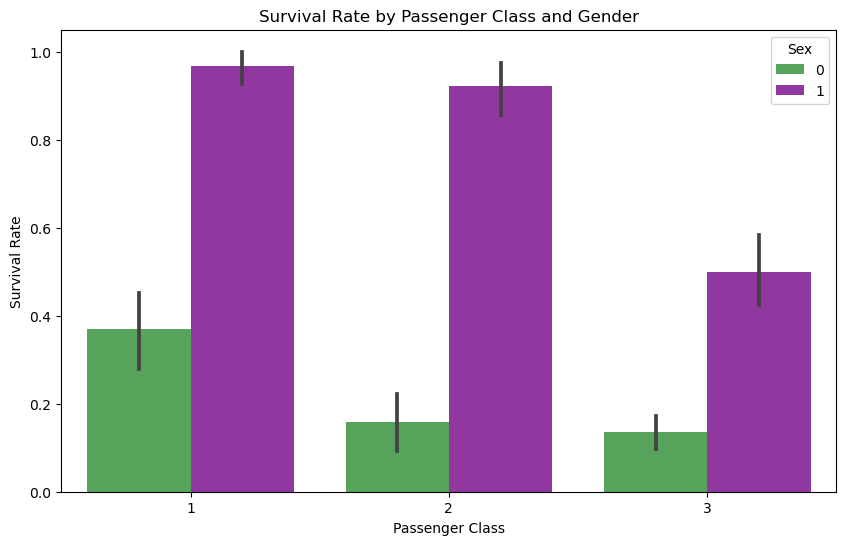

In [69]:
# Define custom colors for the palette
custom_palette = ['#4CAF50', '#9C27B0']  # Green for male, purple for female

# Create the bar plot with custom palette
plt.figure(figsize=(10, 6))
sns.barplot(data=traindata, x='Pclass', y='Survived', hue='Sex', palette=custom_palette)
plt.title('Survival Rate by Passenger Class and Gender')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.legend(title='Sex')
plt.show()


Plot result explanation:
Women had a significantly higher survival rate than men across all passenger classes. In first class, 96.9% of the women survived compared to just 34.5% of the men. The survival rate gap between the genders narrows a bit in second class (87.1% for women vs 47.4% for men) and third class (46.9% for women vs 13.8% for men) but is still substantial.
Passengers in first class had the highest survival rate overall. 62.1% of the passengers in first class survived, whereas only 40.6% of the passengers in second class and 24.3% of the passengers in third class survived.

# Decision Tree Model

In [70]:
# Specify the features and target
X1 = traindata[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]
Y1 = traindata['Survived']

# Model initialization for DECISION TREE
clf_dt = tree.DecisionTreeClassifier()
clf_dt.fit(X1,Y1)

DecisionTreeClassifier()

In [71]:
# Model initialization for RANDOM FOREST
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
clf_rf.fit(X1,Y1)

RandomForestClassifier(max_depth=10, random_state=42)

# Cross-Validation

In [72]:
# Cross-Validation for DECISION TREE model using K-fold
kf = KFold(n_splits=10)
cv_results_dt = cross_val_score(clf_dt, X1, Y1, cv=kf)
print(cv_results_dt)

[0.75555556 0.78651685 0.80898876 0.76404494 0.7752809  0.82022472
 0.82022472 0.80898876 0.83146067 0.82022472]


In [73]:
# Cross-Validation for RANDOM FOREST model:
cv_results_rf = cross_val_score(clf_rf, X1, Y1, cv=kf)
print(cv_results_rf)

[0.73333333 0.80898876 0.82022472 0.80898876 0.85393258 0.83146067
 0.83146067 0.79775281 0.88764045 0.83146067]


In [74]:
# Show the result of the Cross-Validation
cv_mean_dt = np.mean(cv_results_dt)
cv_standard_deviation_dt = np.std(cv_results_dt)
cv_mean_rf = np.mean(cv_results_rf)
cv_standard_deviation_rf = np.std(cv_results_rf)
print("Cross-Validation for DECISION TREE model:")
print("Mean Accuracy:", cv_mean_dt, "\nStandard Deviation:", cv_standard_deviation_dt)
print("\nCross-Validation for RANDOM FOREST model:")
print("Cross-Validation:",cv_mean_rf, "\nStandard Deviation:", cv_standard_deviation_rf)

Cross-Validation for DECISION TREE model:
Mean Accuracy: 0.7991510611735331 
Standard Deviation: 0.025361751691258462

Cross-Validation for RANDOM FOREST model:
Cross-Validation: 0.8205243445692885 
Standard Deviation: 0.03790321386341504


# Plotting Decision Tree

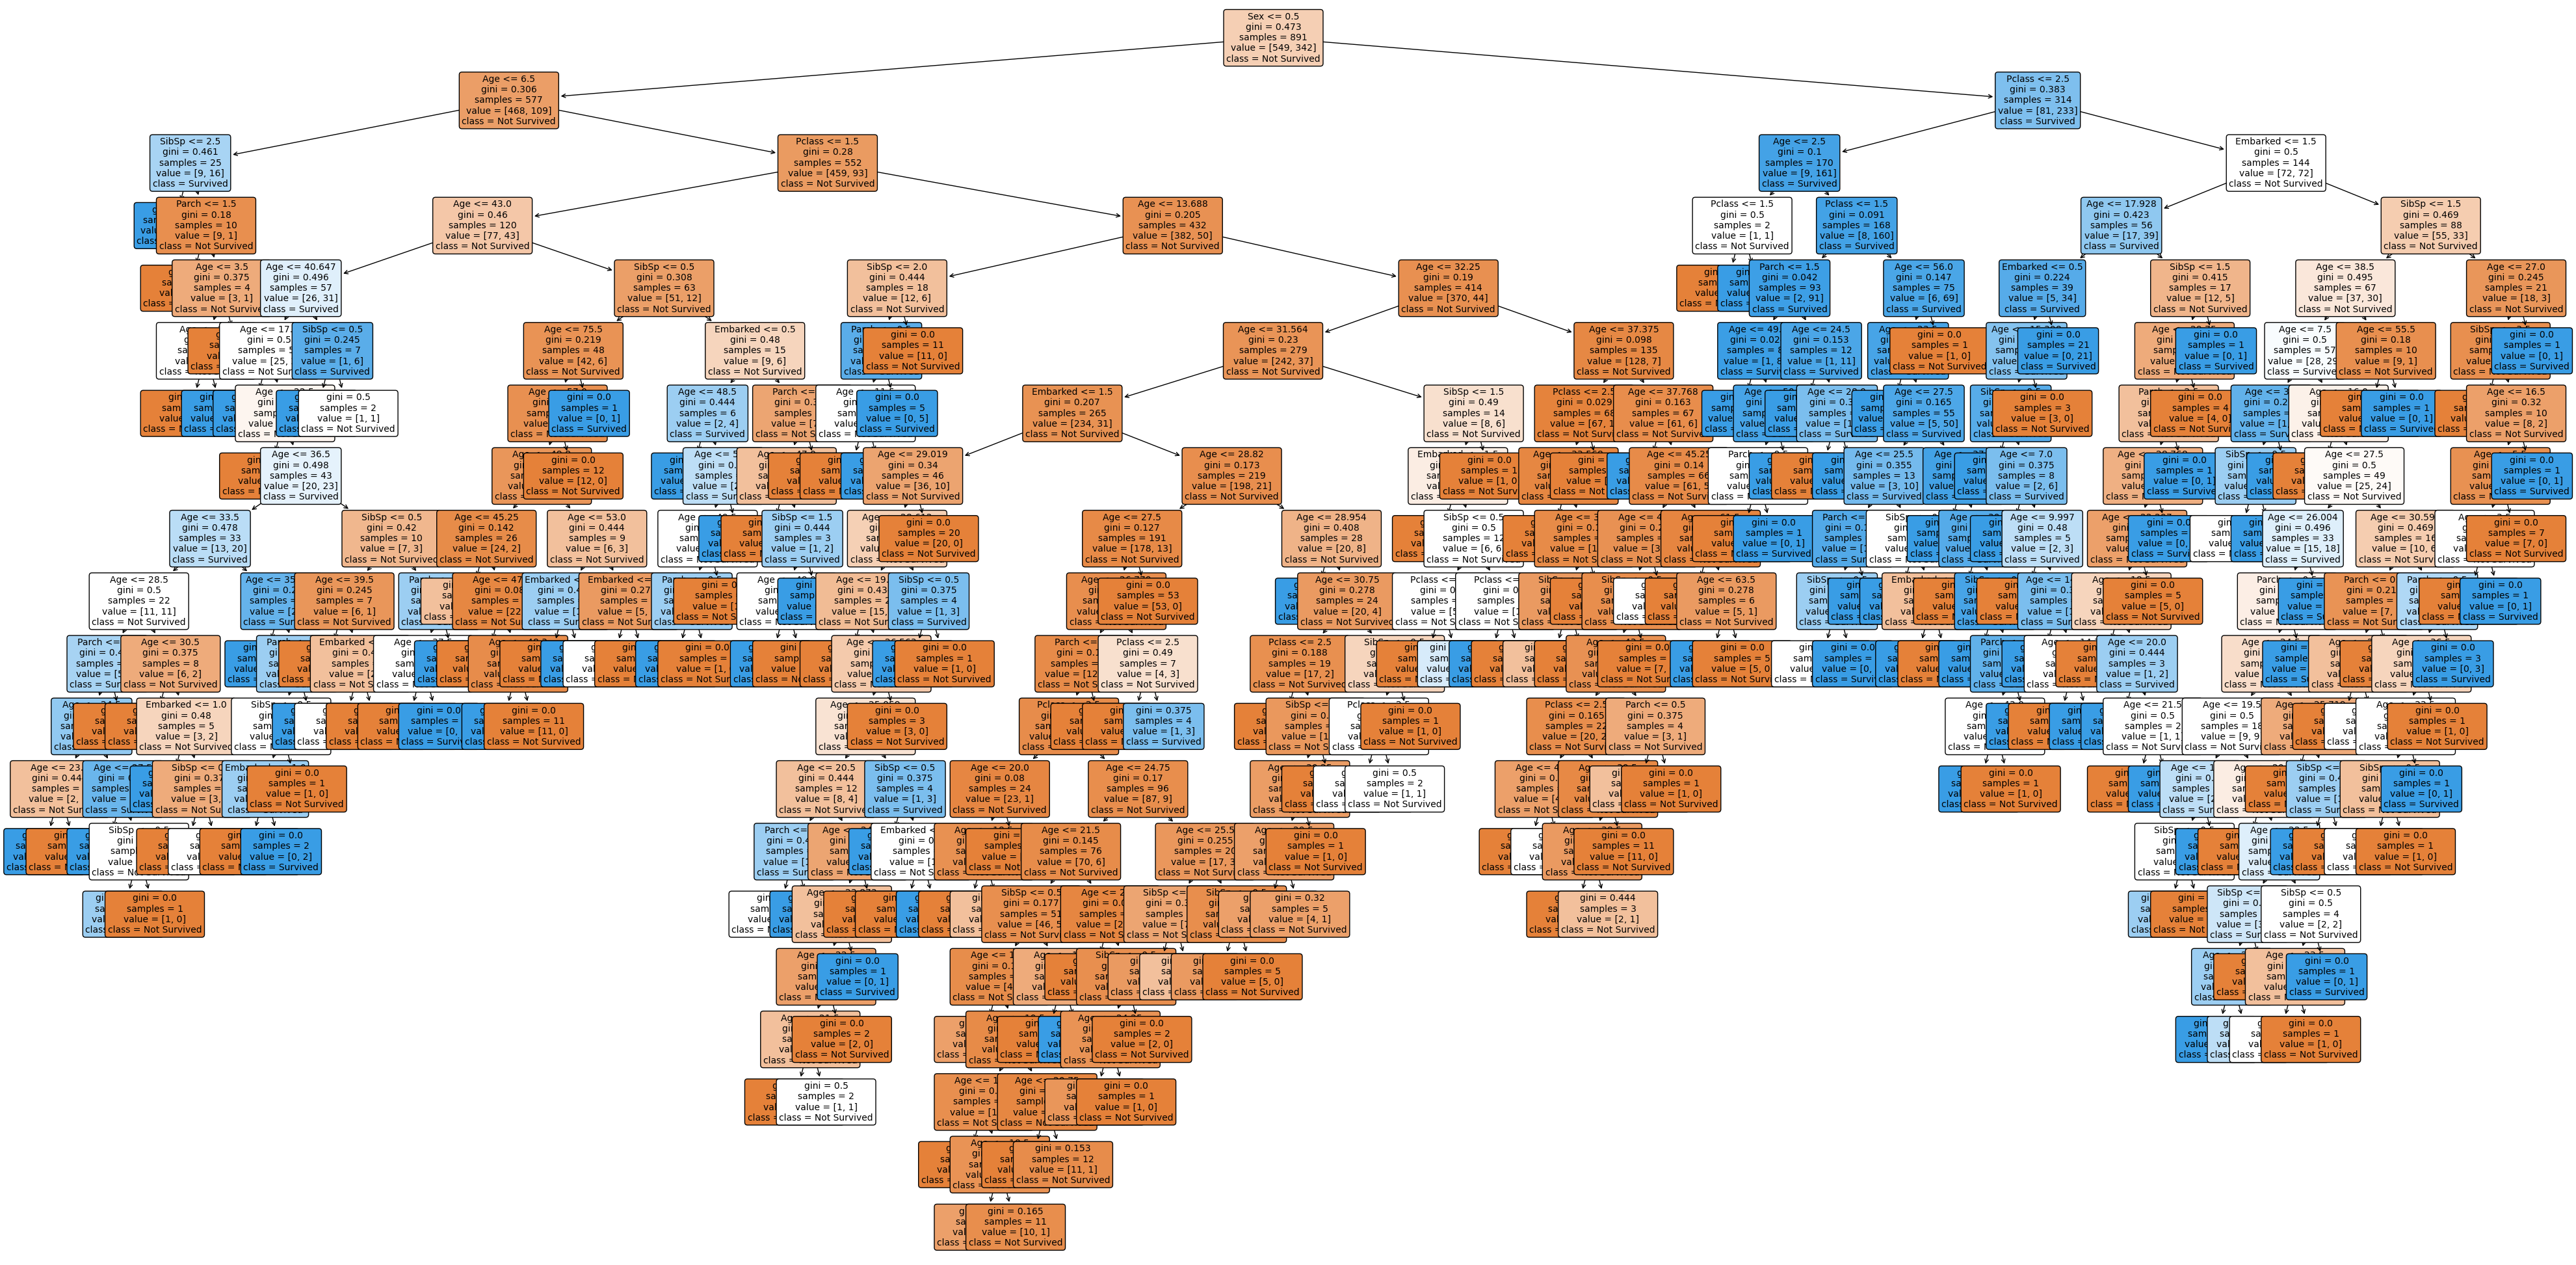

In [75]:
plt.figure(figsize=(50, 25))  
plot_tree(clf_dt, filled=True, feature_names=list(X1.columns), class_names=['Not Survived', 'Survived'], rounded=True, fontsize=10)
plt.show()


In [76]:
#Apply the Classification model on the test dataset to predict the survival on the shipwreck

#Load the test dataset:
testdata = pd.read_csv('titanic_test.csv')
testdata.head(10)
testdata.info()
testdata.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [77]:
# Check which column contains the missing value
testdata.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [78]:
# Drop the unnecessary data columns:
testdata.drop(columns=['Cabin', 'Ticket', 'Fare', 'PassengerId', 'Name'], inplace=True)

In [79]:
# Data transformation: Convert the categorical data into numerical data
testdata['Embarked'].replace({'C': '0', 'Q':'1', 'S':'2'}, inplace = True)
testdata['Sex'].replace({'male': '0', 'female':'1'}, inplace = True)

In [80]:
# From the pre-processing step above, a model to predict the missing age of the training set has been built. 
# Apply the age prediction model on the test set to fulfil the missing location in the Age column:
known_age2 = testdata[testdata['Age'].notnull()]
unknown_age2 = testdata[testdata['Age'].isnull()]

features_for_age2 = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'] # No "Survived" column in the test set, so remove it from the features
X_train_age2 = known_age2[features_for_age2]
Y_train_age2 = known_age2['Age']
X_test_age2 = unknown_age2[features_for_age2]

# Model initialization
age_model.fit(X_train_age2, Y_train_age2)

# Predict the Age (missing) based on the features:
predicted_ages2 = age_model.predict(X_test_age2)
print(predicted_ages2)

# Filling the missing values in the original DataFrame
testdata.loc[testdata['Age'].isnull(), 'Age'] = predicted_ages2

[27.03058912 30.56139177 18.90497222 14.89858381 21.85044854 27.03058912
 39.96143891 26.44333568 29.31303571 32.52857197 23.57512541 27.03058912
 27.03058912 50.3797619  21.42784722 25.76437804 27.03058912 27.03058912
 26.44333568 26.44333568 27.03058912 25.76437804 22.8736847  24.31997024
 26.44333568 22.76423031 35.91996667 21.42784722 39.96143891 39.96143891
 22.8736847  25.76437804 27.03058912 43.72203679 27.03058912 22.8736847
 26.44333568 16.01999333 39.96143891 21.85044854 25.76437804 39.09039763
 27.03058912 25.76437804 27.03058912 35.23619048 25.76437804 26.44333568
 27.03058912 12.89905    27.36598413 27.03058912 26.44333568 27.03058912
 39.96143891 27.03058912 21.85044854 26.44333568 27.46507158 22.8736847
 25.76437804 27.03058912 22.8736847  27.03058912 39.96143891 22.8736847
 18.90497222 29.31303571 25.76437804 27.03058912 22.8736847  22.8736847
 35.96253333  6.10587833 27.03058912 26.44333568 34.04243881 21.42784722
 26.44333568 21.85044854 28.68482227 25.76437804 25.764

In [81]:
# Check if all the missing values in Age have been replaced:
testdata['Age'].isnull().sum()

0

In [82]:
# Create columns named "Survived"
testdata['Survived_dtmodel'] = None
testdata['Survived_rfmodel'] = None

In [83]:
# Apply the Classification model on the test set
X2 = testdata[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]
# Using DECISION TREE model:
prediction_dt = clf_dt.predict(X2)
print('DECISION TREE predictions:\n', prediction_dt)

# Using RANDOM FOREST model:
prediction_rf = clf_rf.predict(X2)
print('\nRANDOM FOREST predictions:\n', prediction_rf)

DECISION TREE predictions:
 [0 0 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1
 1 0 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1
 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0
 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 1 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0
 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1
 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1
 0 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 0
 0 0 1 0 1 0 1 1 0 1 1]

RANDOM FOREST predictions:
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 

In [84]:
# Calculate the survival rate for better comparison
testdata['Survived_dtmodel'] = prediction_dt
survival_rate_dt = testdata['Survived_dtmodel'].sum()/len(testdata['Survived_dtmodel'])*100
testdata['Survived_rfmodel'] = prediction_rf
survival_rate_rf = testdata['Survived_rfmodel'].sum()/len(testdata['Survived_rfmodel'])*100

In [85]:
# Show the outputs
print('The survival rate of the test dataset using DECISION TREE CLASSIFIER is: ', survival_rate_dt,'%')
print('\nThe survival rate of the test dataset using RANDOM FOREST CLASSIFIER is: ', survival_rate_rf,'%')

The survival rate of the test dataset using DECISION TREE CLASSIFIER is:  45.21531100478469 %

The survival rate of the test dataset using RANDOM FOREST CLASSIFIER is:  32.29665071770335 %
